In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd drive/My\ Drive/Colab\ Notebooks

/content/drive/My Drive/Colab Notebooks


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from helpers.helper_functions import *

# Added Imports and Libraries
import warnings
warnings.filterwarnings('ignore')
from operator import itemgetter

In [ ]:
cd data

/content/drive/My Drive/Colab Notebooks/data


# The Significant Bang Theory

Attention, dear Center for Digital Health Intervention (CDHI) Candidate!

The Sheldon Cooper we all know and love (OK, some of us might not know him, and some might not love him) from the TV series "The Big Bang Theory" has gotten into an argument with Leonard from the same TV show. Sheldon insists that he knows the show better than anyone, and keeps making various claims about the show, which neither of them know how to prove or disprove. The two of them have reached out to you ladies and gentlemen, as data scientists, to help them. You will be given the full script of the series, with information on the episode, the scene, the person saying each dialogue line, and the dialogue lines themselves.

Leonard has challenged several of Sheldon's claims about the show, and throughout this exam you will see some of those and you will get to prove or disprove them, but remember: sometimes, we can neither prove a claim, nor disprove it!

## Important notes
* Don't forget to add a textual description of your thought process, the assumptions you made, and your results!
* Please write all your comments in English, and use meaningful variable names in your code.
* Data science is all about multiple iterations on the same dataset. Do not obsess over small details in the beginning, and try to complete as many tasks as possible during the first 2 hours. Then, go back to the obtained results, write meaningful comments, and debug your code if you have found any glaring mistake.
* Fully read the instructions for each question before starting to solve it to avoid misunderstandings, and remember to save your notebook often!
* The challenge contains **15 questions organised into 4 tasks**, and is designed for more than 3 hours.
* You can use all the online resources you want.
* Remember, this is not a homework assignment -- no teamwork allowed!

## Submission
* Your file has to be named as "NameSurname.ipynb".
* When you are done please send the Jupyter Notebook to David Cleres (dcleres@ethz.ch) via mail. 

## Task A: Picking up the shovel (10 points)

**Note: You will use the data you preprocess in this task in all the subsequent ones.**

Our friends' argument concerns the entire show. We have given you a file in the `data/` folder that contains the script of every single episode. New episodes are indicated by '>>', new scenes by '>', and the rest of the lines are dialogue lines. Some lines are said by multiple people (for example, lines indicated by 'All' or 'Together'); **you must discard these lines**, for the sake of simplicity. However, you do not need to do it for Q1 in this task -- you'll take care of it when you solve Q2.

**Q1**. (5 points) Your first task is to extract all lines of dialogue in each scene and episode, creating a dataframe where each row has the episode and scene where a dialogue line was said, the character who said it, and the line itself. You do not need to extract the proper name of the episode (e.g. episode 1 can appear as "Series 01 Episode 01 - Pilot Episode", and doesn't need to appear as "Pilot Episode"). Then, answer the following question: In total, how many scenes are there in each season? We're not asking about unique scenes; the same location appearing in two episodes counts as two scenes. You can use a Pandas dataframe with a season column and a scene count column as the response.

**Note: The data refers to seasons as "series".**

In [ ]:
#  Importing Data

data = pd.read_table("all_scripts.txt", header=None)

ep   = data[data[0].str.match('>>')].reset_index()
ep_i = data[data[0].str.match('>>')].index.values

sc   = data[data[0].str.match('> ')].reset_index()
sc_i = data[data[0].str.match('> ')].index.values

scene_count = sc.shape[0]
# Adding index to list of scenes to keep 2 scenes with same location as different
sc = sc.rename(columns={0:"scene"})
a = []
a = pd.DataFrame(range(0,scene_count))
sc["scene"] = a[0].astype(str)+ " - " + sc["scene"].str.replace('> ', '')

data.head()

,0
0,>> Series 01 Episode 01 – Pilot Episode
1,> A corridor at a sperm bank.
2,Sheldon: So if a photon is directed through a ...
3,"Leonard: Agreed, what’s your point?"
4,"Sheldon: There’s no point, I just think it’s a..."


In [ ]:
# Assigning Corresponding Episode and Scene to individual Dialogues in the DataFrame

for i in range(0, ep_i.size-1):
  rows = range(ep_i[i] , ep_i[i+1])
  data.loc[rows,'Episode'] = ep[0][i].strip('>>')

i = i+1
rows = range(ep_i[i] , data[0].size)
data.loc[rows,'Episode'] = ep[0][i].strip('>>')

for i in range(0, sc_i.size-1):
  rows = range(sc_i[i] , sc_i[i+1])
  data.loc[rows,'Scene'] = sc["scene"][i].strip('>')

i = i+1
rows = range(sc_i[i] , data[0].size)
data.loc[rows,'Scene'] = sc["scene"][i].strip('>')

In [ ]:
# Extracting Data from DataFrame for segregation of Scene, Episode, Seires, Character

character = data[0].str.split(pat=":",expand=True)[0]
lines     = data[0].str.split(pat=":",expand=True)[1]
scenes    = data['Scene']
series    = data['Episode'].str.split(pat=" ",expand=True)[2]
episode   = data['Episode'].str.split(pat="–",expand=True)[0]

In [ ]:
# Bundling DataFrame withe Required Variables
df1 = []
for i in range(0, data[0].size):
  df1.append(np.hstack((series[i], episode[i], scenes[i], character[i], lines[i])))
df1 = pd.DataFrame(df1,columns=["Season", "Episode","Scene","Character","Lines"])

# Removing Indices with None Lines correcting for Data Table indices considering original Episode and Scene headings
res = [i for i in range(len(df1.Lines)) if df1.Lines[i] == None] 
df = df1.drop(index = res)

df = df.reset_index()
df = df.drop(columns="index")

# df = df.reset_index()
# df = df.rename(columns={"index": "ID"})
# df["EpisodeScenes"] = df["ID"].astype(str) + "-" + df["Episode"] + "-" + df["Scene"]

df.head()

,Season,Episode,Scene,Character,Lines
0,01,Series 01 Episode 01,0 - A corridor at a sperm bank.,Sheldon,So if a photon is directed through a plane wi...
1,01,Series 01 Episode 01,0 - A corridor at a sperm bank.,Leonard,"Agreed, what’s your point?"
2,01,Series 01 Episode 01,0 - A corridor at a sperm bank.,Sheldon,"There’s no point, I just think it’s a good id..."
3,01,Series 01 Episode 01,0 - A corridor at a sperm bank.,Leonard,Excuse me?
4,01,Series 01 Episode 01,0 - A corridor at a sperm bank.,Receptionist,Hang on.


In [ ]:
# Counting Scenes Per Season
no_of_scenes = df.groupby('Season').Scene.nunique()
print(no_of_scenes)

Season
01    160
02    231
03    236
04    279
05    254
06    304
07    332
08    327
09    337
10    346
Name: Scene, dtype: int64


In [ ]:
no_of_scenes.sum()

2806

**Q2**. (5 points) Now, let's define two sets of characters: all the characters, and recurrent characters. Recurrent characters are those who appear in more than one episode. For the subsequent sections, you will need to have a list of recurrent characters. Assume that there are no two _named characters_ (i.e. characters who have actual names and aren't referred to generically as "little girl", "grumpy grandpa", etc.) with the same name, i.e. there are no two Sheldons, etc. Generate a list of recurrent characters who have more than 90 dialogue lines in total, and then take a look at the list you have. If you've done this correctly, you should have a list of 20 names. However, one of these is clearly not a recurrent character. Manually remove that one, and print out your list of recurrent characters. To remove that character, pay attention to the _named character_ assumption we gave you earlier on. **For all the subsequent questions, you must only keep the dialogue lines said by the recurrent characters in your list.**

_Hint: "I know all the recurrent characters because I've watched the entire series five times" is not an acceptable argument, so you need to actually generate the list._

In [ ]:
# Counting Scenes Per Season

# Grouping by Character, Sorting on unique Dialogue Lines 
# [Additionally Sorting and resetting index for counting]
recur = pd.DataFrame(df.groupby('Character').Lines.nunique().sort_values()).reset_index()

# Eliminating Characters from the list with less than 90 Dialogues to get Recurring Characters
rec_lin = [i for i in range(len(recur.Lines)) if recur.Lines[i] < 90]
recur = recur.drop(index = rec_lin)

# Recurring Characters with their Lines Count 
recur

,Character,Lines
179,Bert,93
180,Man,102
181,Kripke,106
182,Leslie,114
183,Wil,124
184,Zack,129
185,Arthur,129
186,Mrs Wolowitz,135
187,Beverley,159
188,Emily,159


Observation : The Character of **Man** appears in the list possibly due to multiple occurences with singular description as Man across seasons.

This entry is manually removed.

In [ ]:
recur = recur.drop([180])

In [ ]:
c = recur.Character

In [ ]:
c.reset_index(drop=True)

0             Bert
1           Kripke
2           Leslie
3              Wil
4             Zack
5           Arthur
6     Mrs Wolowitz
7         Beverley
8            Emily
9       Mrs Cooper
10           Priya
11          Stuart
12      Bernadette
13             Amy
14             Raj
15          Howard
16           Penny
17         Leonard
18         Sheldon
Name: Character, dtype: object

In [ ]:
# Creating a separate Dataset consisting of lines only from the Recurring Characters
id_c = [i for i in range(0,df.shape[0]) if df.Character[i] in np.asarray(c)]
df_r = df.loc[id_c]
df_r = df_r.reset_index()
df_r = df_r.drop(columns ="index")

df_r.head()

,Season,Episode,Scene,Character,Lines
0,01,Series 01 Episode 01,0 - A corridor at a sperm bank.,Sheldon,So if a photon is directed through a plane wi...
1,01,Series 01 Episode 01,0 - A corridor at a sperm bank.,Leonard,"Agreed, what’s your point?"
2,01,Series 01 Episode 01,0 - A corridor at a sperm bank.,Sheldon,"There’s no point, I just think it’s a good id..."
3,01,Series 01 Episode 01,0 - A corridor at a sperm bank.,Leonard,Excuse me?
4,01,Series 01 Episode 01,0 - A corridor at a sperm bank.,Leonard,"One across is Aegean, eight down is Nabakov, ..."


## Task B: Read the ~~stats~~ scripts carefully (30 points)

### Part 1: Don't put the shovel down just yet

**Q3**. (2.5 points) From each dialogue line, replace punctuation marks (listed in the EXCLUDE_CHARS variable provided in `helpers/helper_functions.py`) with whitespaces, and lowercase all the text. **Do not remove any stopwords, leave them be for all the questions in this task.**

In [ ]:
df_rm = df_r.copy()
def mod_text(text):
    chars = EXCLUDE_CHARS
    for c in chars:
        text = text.replace(c, " ")
        text = text.lower()
    return text
        
df_rm['Lines'] = df_r['Lines'].apply(mod_text)

df_rm.head()

,Season,Episode,Scene,Character,Lines
0,01,Series 01 Episode 01,0 - A corridor at a sperm bank.,Sheldon,so if a photon is directed through a plane wi...
1,01,Series 01 Episode 01,0 - A corridor at a sperm bank.,Leonard,agreed what s your point
2,01,Series 01 Episode 01,0 - A corridor at a sperm bank.,Sheldon,there s no point i just think it s a good id...
3,01,Series 01 Episode 01,0 - A corridor at a sperm bank.,Leonard,excuse me
4,01,Series 01 Episode 01,0 - A corridor at a sperm bank.,Leonard,one across is aegean eight down is nabakov ...


**Q4**. (5 points) For each term, calculate its "corpus frequency", i.e. its number of occurrences in the entire series. Visualize the distribution of corpus frequency using a histogram. Explain your observations. What are the appropriate x and y scales for this plot?

In [ ]:
from collections import Counter

words = df_rm['Lines'].str.split(pat=" ")  
bag = []

for i in range(0,df_rm.shape[0]):
  bag.extend(words[i])

# Corpus Frequency Variable
cf_temp = Counter(bag)
corpus_freq = sorted(cf_temp.items(), key=itemgetter(1), reverse = True)

In [ ]:
# Creating lists of Word, Counts
# cf_l,  cf_v  represent lists of word, count pairs sorted by counts.
# cf_lc, cf_vc represent lists of word, count pairs sorted by counts for top 100 words.


# Most Common 100 Words 
cf_lc = []
cf_vc = []
cf_sample = cf_temp.most_common(100)
cf_lc, cf_vc = zip(*cf_sample)

# Complete Corpus Parsing
cf_l = []
cf_v = []
cf_l, cf_v = zip(*corpus_freq)

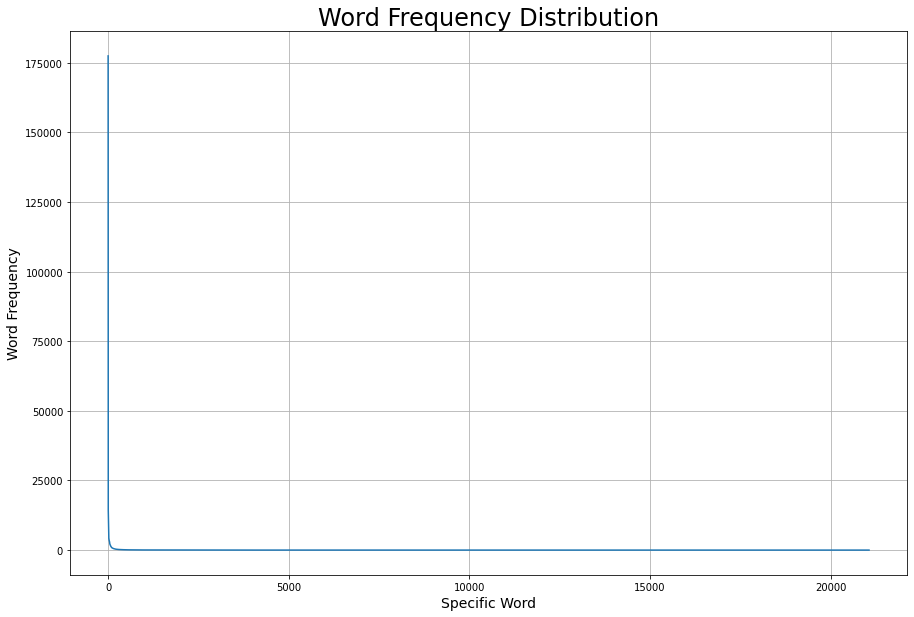

In [ ]:
# Plotting a Histogram of Word counts
l = range(0, len(corpus_freq))

plt.figure(figsize=(15,10))
plt.xlabel('Specific Word',fontsize=14)
plt.ylabel('Word Frequency',fontsize=14)
plt.title('Word Frequency Distribution',fontsize=24)
plt.grid(True)
plt.plot(l, cf_v)
plt.show()

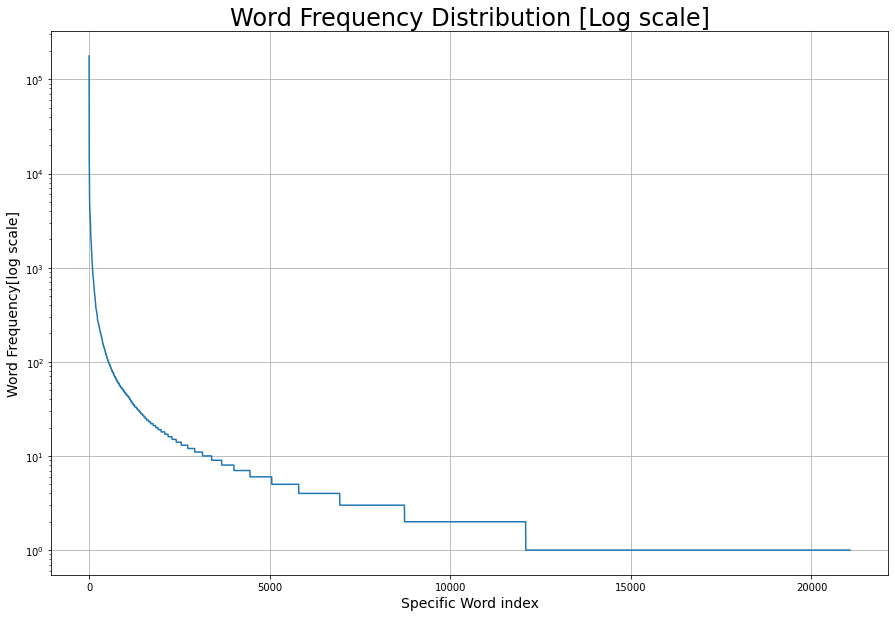

In [ ]:
# Plotting a Histogram of Word counts
l = range(0, len(corpus_freq))

plt.figure(figsize=(15,10))
plt.yscale('log')
#plt.xscale('log')
plt.xlabel('Specific Word index',fontsize=14)
plt.ylabel('Word Frequency[log scale]',fontsize=14)
plt.title('Word Frequency Distribution [Log scale]',fontsize=24)
plt.grid(True)
plt.plot(l, cf_v)
plt.show()

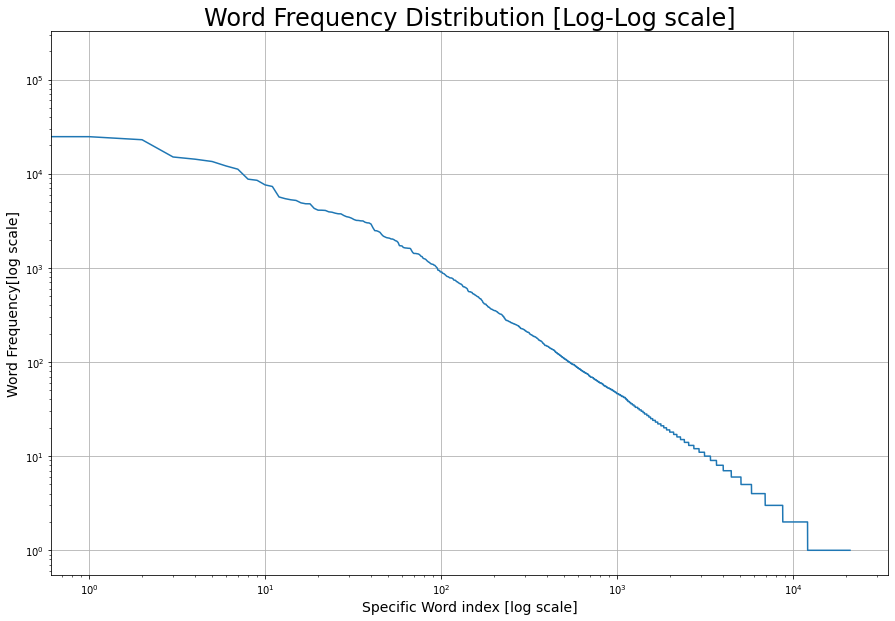

In [ ]:
# Plotting a Histogram of Word counts
l = range(0, len(corpus_freq))

plt.figure(figsize=(15,10))
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Specific Word index [log scale]',fontsize=14)
plt.ylabel('Word Frequency[log scale]',fontsize=14)
plt.title('Word Frequency Distribution [Log-Log scale]',fontsize=24)
plt.grid(True)
plt.plot(l, cf_v)
plt.show()

<font color='red'> **Answer 4** </font> 

**Explanation**

The corpus elements includes spaces as characters and hence, the most occuring character string is that of whitespace with *177458* samples. While charting the samples, the skewed usage of words is observable. The distribution of words is highly uneven.

Upon selecting a log scale for the word count (y axis), it is seen that the word count distribution is exponential across the words - meaning usage of words decays exponentially as the words become peculiar to the general vocabulary of the show.

Upon selecting a log-log scale for the graph (x & y axis are both log scaled), a linear distribution is observed, with stepped occurence towards the tail. This shows a behaviour similar to *Zipfian Distribution*.

### Part 2: Talkativity
**Q5**. (2.5 points) For each of the recurrent characters, calculate their total number of words uttered across all episodes. Based on this, who seems to be the most talkative character?

In [ ]:
df_rm['wordcount'] = df_rm['Lines'].str.split().str.len()
wordcount = pd.DataFrame(df_rm.groupby('Character').wordcount.sum().sort_values())

In [ ]:
wordcount

,wordcount
Character,
Bert,1146
Kripke,1246
Leslie,1249
Zack,1427
Arthur,1451
Mrs Wolowitz,1459
Emily,1571
Wil,1678
Priya,1940


<font color='red'> **Answer 5** </font> 

***Sheldon*** is the most talkative character with a word count of 184572.

**Q6**. (12.5 points) For each of the recurrent characters, calculate their total number of words uttered per episode (ignoring episodes that the character does not appear in), and calculate a **robust summary statistic** for the word count distribution of each person.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**i)** (2.5 points) What changes do you observe, compared to the analysis in Q5?

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ii)** (2.5 points) Why is this analysis an improvement over the previous one, and how could you improve it even further? _Hint: The improvement involves making your unit for word counts even more granular - you can go further down than episodes._

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**iii)** (7.5 points) Incorporate that improvement. Do you still see the same results? How **confident** can you be that the "most talkative" person given by this twice improved method is really more talkative than the second most talkative one? _Hint: Read the question again. A good idea would be to use bootstrapping and calculate your summary statistic on each bootstrapped set._

In [ ]:
# (i) & (ii) Word Count per Series per Episode
wordcount_perepisode = pd.DataFrame(df_rm.groupby(['Character','Episode'])['wordcount'].sum())
wordcount_perepisode.reset_index(inplace=True)
wordcount_perepisode

,Character,Episode,wordcount
0,Amy,Series 03 Episode 23,103
1,Amy,Series 04 Episode 01,143
2,Amy,Series 04 Episode 03,473
3,Amy,Series 04 Episode 05,229
4,Amy,Series 04 Episode 08,602
...,...,...,...
1636,Zack,Series 04 Episode 17,153
1637,Zack,Series 07 Episode 09,126
1638,Zack,Series 07 Episode 11,17
1639,Zack,Series 09 Episode 22,218


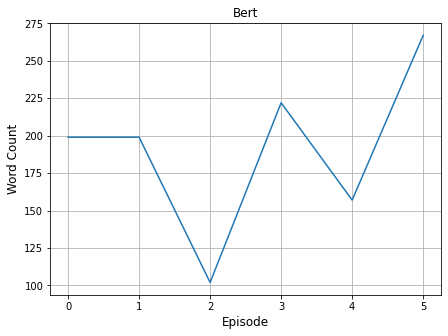

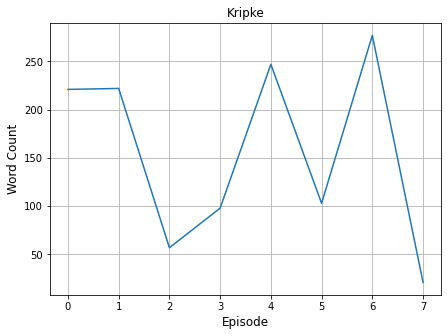

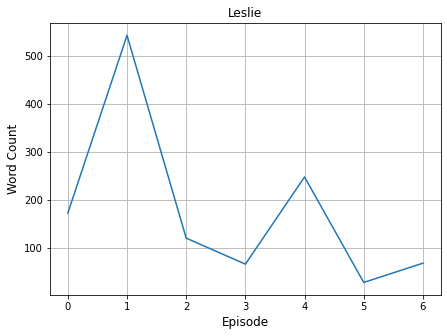

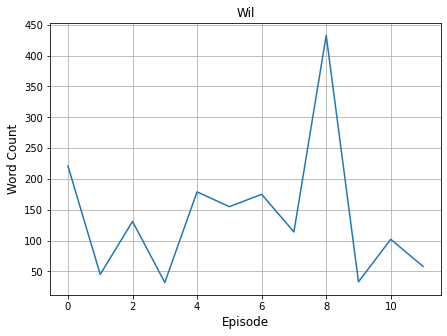

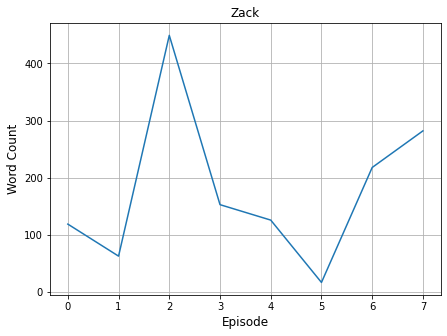

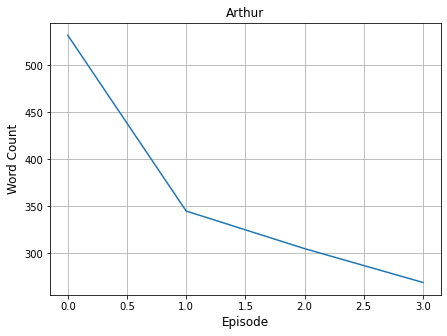

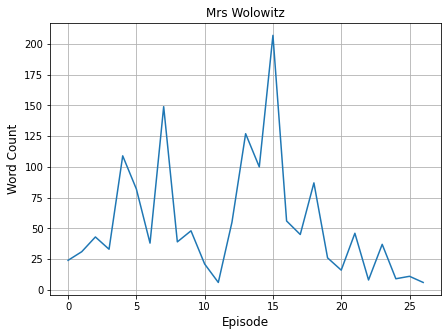

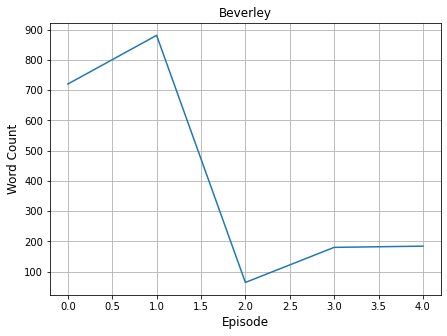

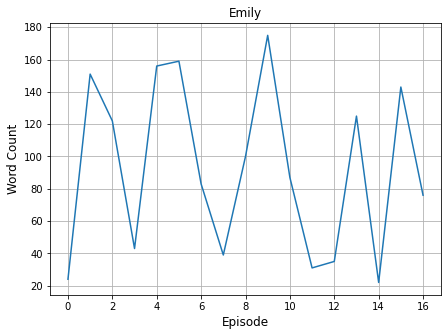

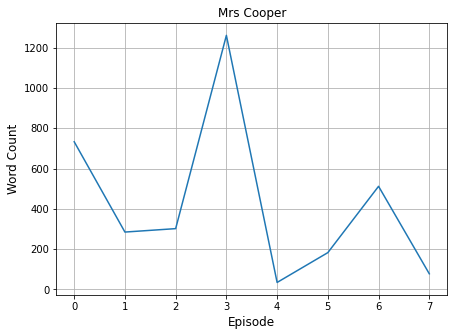

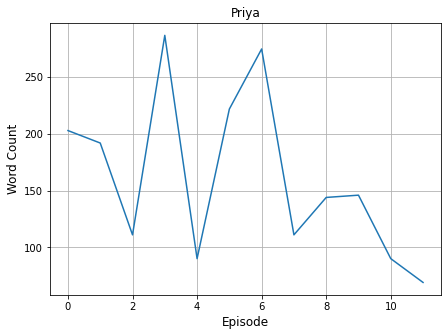

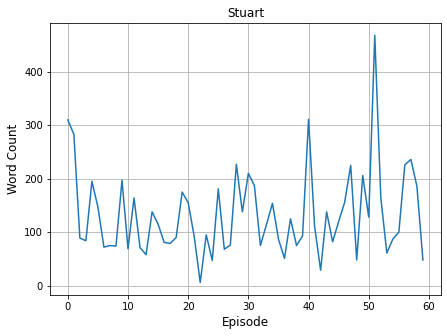

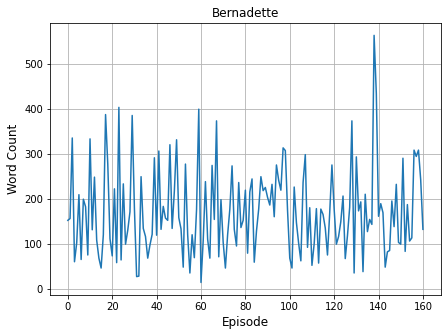

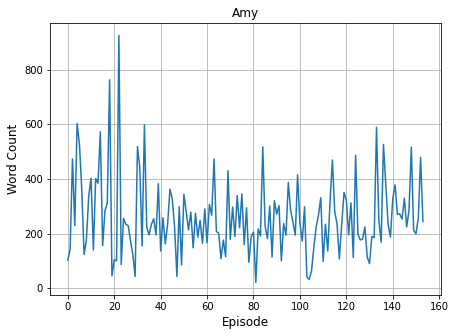

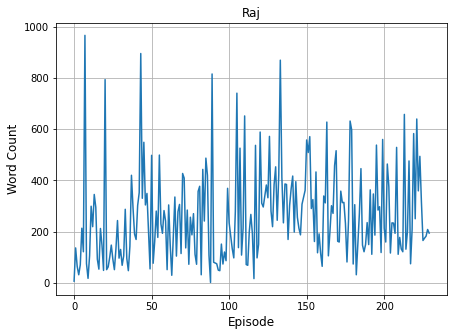

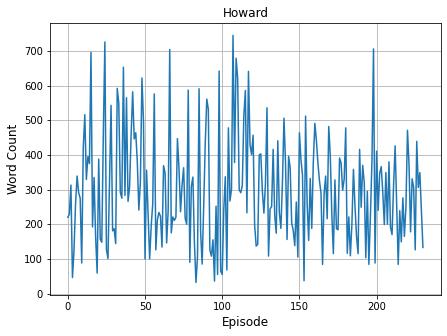

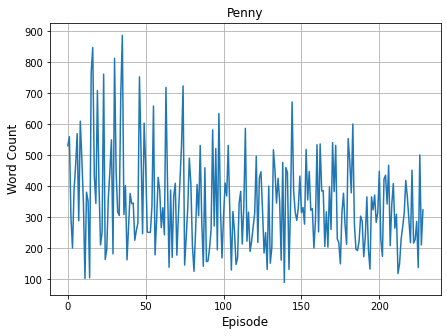

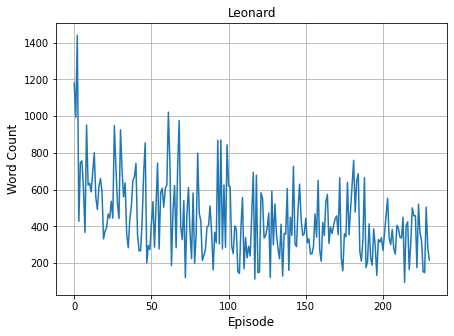

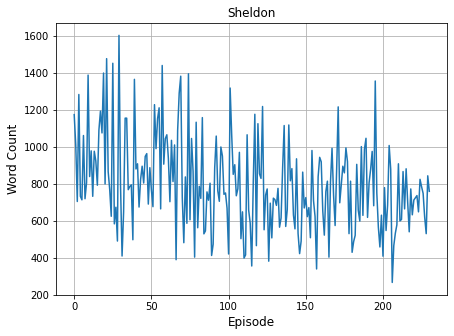

In [ ]:
woc = []
for k in c:
  woc.append(wordcount_perepisode.loc[wordcount_perepisode['Character'] == k ])

c = np.asarray(c)
for i in range(0,len(c)):
  x = range(0,woc[i].shape[0])
  y = woc[i]['wordcount']
  plt.figure(figsize=(7,5))
  plt.xlabel('Episode',fontsize=12)
  plt.ylabel('Word Count',fontsize=12)
  plt.title(c[i])
  plt.grid(True)
  plt.plot(x, y)
  plt.show()

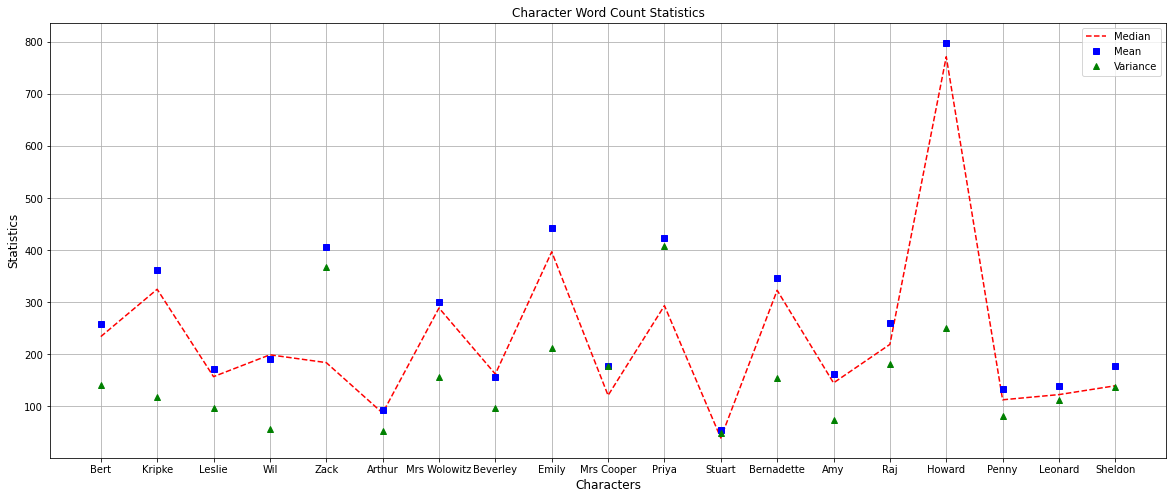

In [ ]:
# Proposed Robust Summary Statistics - Mean, Median and Standard Deviation

c_wc_pe_md = wordcount_perepisode.groupby(['Character'])['wordcount'].median()
c_wc_pe_vr = wordcount_perepisode.groupby(['Character'])['wordcount'].std()
c_wc_pe_mn = wordcount_perepisode.groupby(['Character'])['wordcount'].mean()


plt.figure(figsize=(20,8))
plt.xlabel('Characters',fontsize=12)
plt.ylabel('Statistics',fontsize=12)
plt.title('Character Word Count Statistics')
plt.grid(True)
plt.plot(c, c_wc_pe_md, 'r--', label = 'Median')
plt.plot(c, c_wc_pe_mn, 'bs', label = 'Mean')
plt.plot(c, c_wc_pe_vr, 'g^', label = 'Variance')
plt.legend()
plt.show()

In [ ]:
# (iii) Word Count per Series per Episode per Scene
wordcount_perepisode_perscene = pd.DataFrame(df_rm.groupby(['Character','Episode','Scene'])['wordcount'].sum())
wordcount_perepisode_perscene.reset_index(inplace=True)
wordcount_perepisode_perscene

,Character,Episode,Scene,wordcount
0,Amy,Series 03 Episode 23,626 - A coffee shop.,103
1,Amy,Series 04 Episode 01,633 - Penny’s car. Amy is now in the back seat.,36
2,Amy,Series 04 Episode 01,635 - A restaurant.,107
3,Amy,Series 04 Episode 03,649 - The apartment.,132
4,Amy,Series 04 Episode 03,650 - The Cheesecake Factory,128
...,...,...,...,...
8374,Zack,Series 09 Episode 22,2427 - The wine tasting.,62
8375,Zack,Series 10 Episode 22,2757 - A bar.,79
8376,Zack,Series 10 Episode 22,2760 - A restaurant.,16
8377,Zack,Series 10 Episode 22,2762 - The restaurant.,144


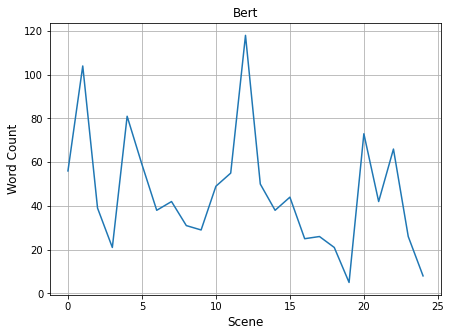

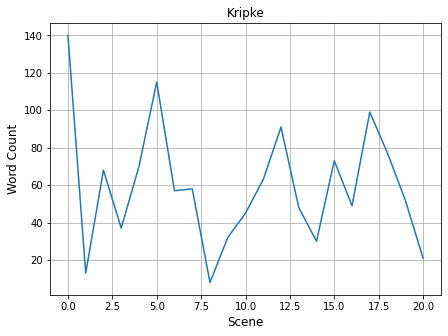

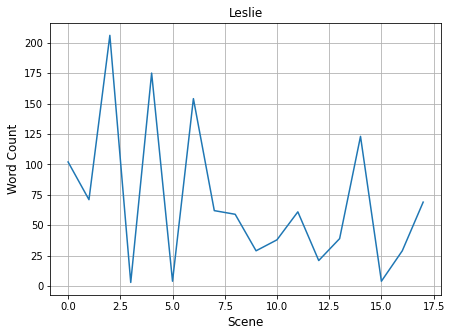

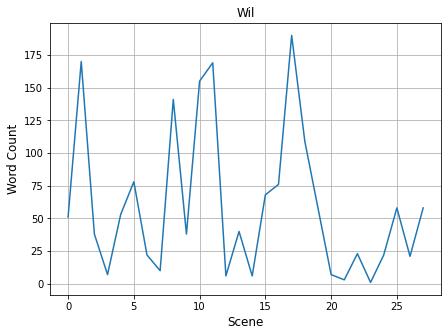

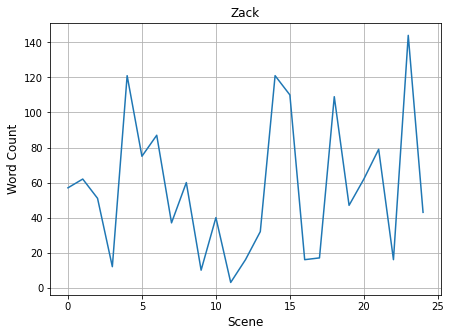

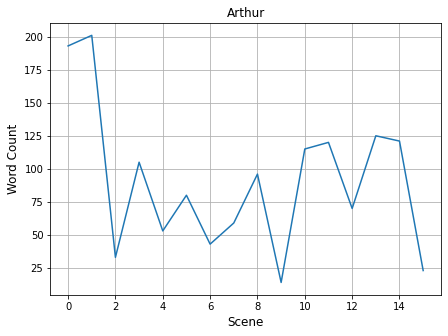

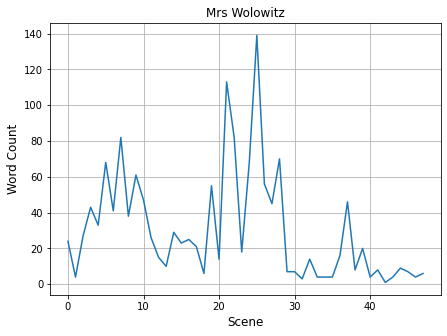

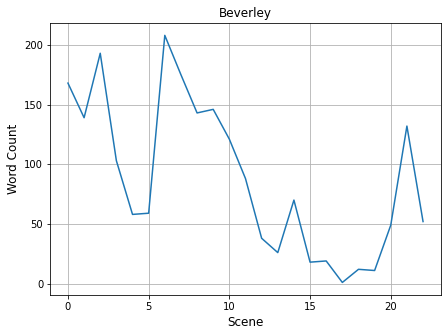

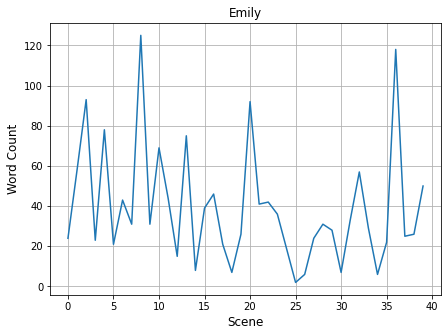

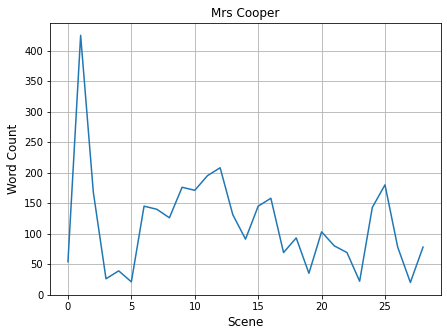

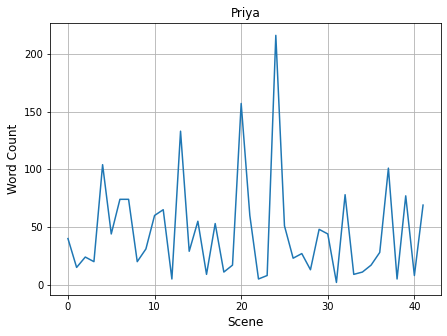

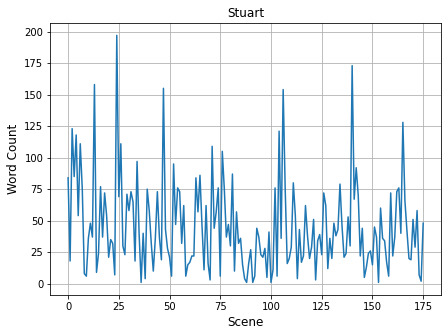

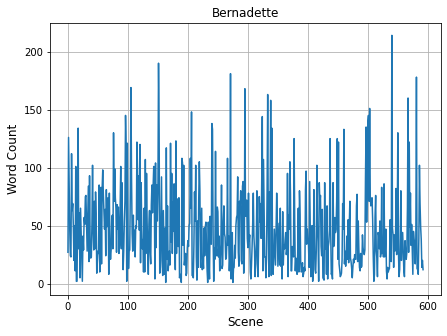

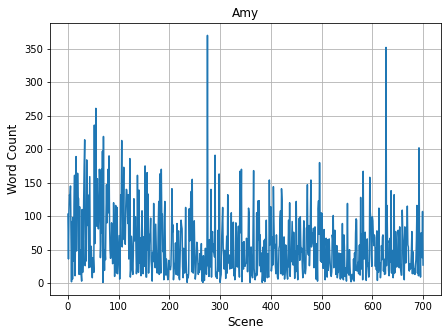

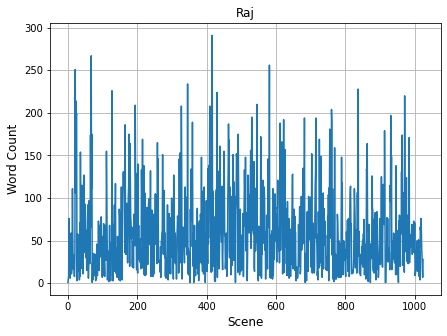

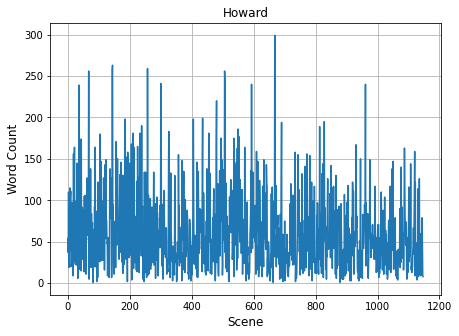

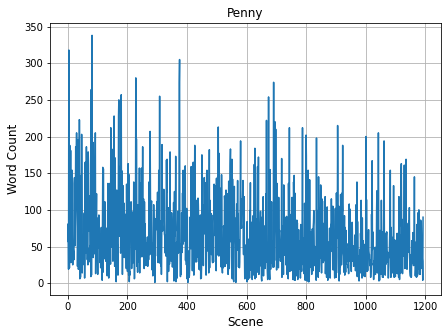

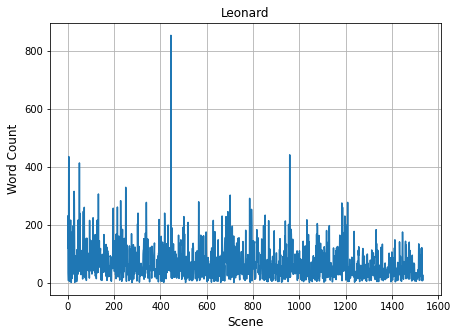

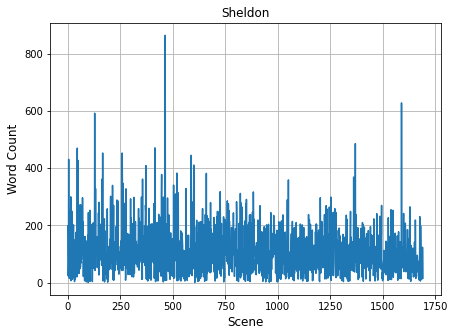

In [ ]:
wos = []
for k in c:
  wos.append(wordcount_perepisode_perscene.loc[wordcount_perepisode_perscene['Character'] == k ])

c = np.asarray(c)
for i in range(0,len(c)):
  x = range(0,wos[i].shape[0])
  y = wos[i]['wordcount']
  plt.figure(figsize=(7,5))
  plt.xlabel('Scene',fontsize=12)
  plt.ylabel('Word Count',fontsize=12)
  plt.title(c[i])
  plt.grid(True)
  plt.plot(x, y)
  plt.show()

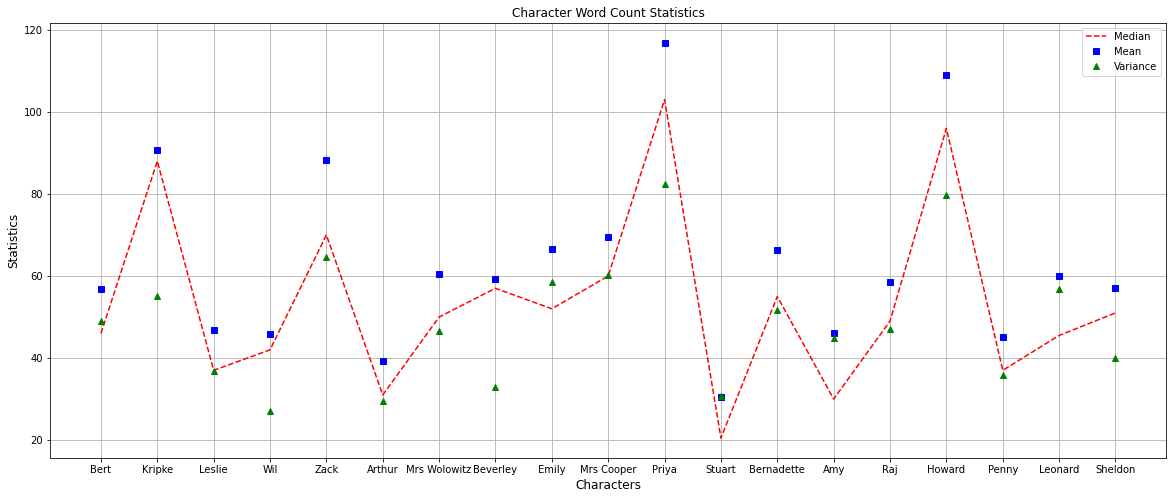

In [ ]:
# Proposed Robust Summary Statistics - Mean, Median and Standard Deviation

c_wc_ps_md = wordcount_perepisode_perscene.groupby(['Character'])['wordcount'].median()
c_wc_ps_vr = wordcount_perepisode_perscene.groupby(['Character'])['wordcount'].std()
c_wc_ps_mn = wordcount_perepisode_perscene.groupby(['Character'])['wordcount'].mean()


plt.figure(figsize=(20,8))
plt.xlabel('Characters',fontsize=12)
plt.ylabel('Statistics',fontsize=12)
plt.title('Character Word Count Statistics')
plt.grid(True)
plt.plot(c, c_wc_ps_md, 'r--', label = 'Median')
plt.plot(c, c_wc_ps_mn, 'bs', label = 'Mean')
plt.plot(c, c_wc_ps_vr, 'g^', label = 'Variance')
plt.legend()
plt.show()

<font color='red'> **Answer 6 (i)** </font> 

1. This statistic of Words spoken by Character per season per episode gives a granular look at the distribution of dialogues.
The first statistic - word count of a character - just provides the information of the most talkative character in terms of all the episodes combined.

2. In the current statistic -, a detailed view provides a look at when the characters (specifically recurring ) are appearing first. Since we see differences in the number of appearances and word count across episodes, we are able to differentiate between recurring characters of relative importances.  

<font color='red'> **Answer 6 (ii)** </font> 

Median and Variance/Standard deviation of ***word counts per episode*** are chose as statistics to determine the overall talkativeness of the character.

The most talkative character based on median of words uttered per episode is calculated. The top 5 most talkative characters are - 
* Mrs Cooper      293.5
* Penny           323.0
* Arthur          325.0
* Leonard         397.0
* Sheldon         772.0

1. We are able to see the importance of a recurring character amongst the list of characters and infer who are central to the storyline.

2. We observe that the distribution of words is almost even for the later-in-the-seasons appearing characters. 

3. We can also see changes in the characters beoming main from recurring. Another aspect observed is the gradually increasing importance of the characters in the scenes over the seasons - exampples - *Amy and Bernadette*.
4. Most of the characters of this list are lead characters of the series, which confirms the centrality of using the median across episodes, since the story-line for an episode more or less revolves around the series leads.
5. Additional measure of variance provides us the information of the spread of words - thus, although some characters may have high median word counts, their standard deviation gives an indication of the over-all presence in the episodes all over.

Another level of granularity is that of words per scene, which gives an indirect measure of the duration appearance of a character.
This analysis is performed as shown above.

<font color='red'> **Answer 6 (iii)** </font> 



Median and Variance/Standard deviation of ***word counts per episode per scene*** are chose as statistics to determine the overall talkativeness of the character.

The most talkative character based on median of words uttered per episode per scene is calculated. The top 5 most talkative characters are - 

* Bert             82.0
* Beverley        107.0
* Arthur          107.5
* Sheldon         117.0
* Mrs Cooper      128.5

1. It can be seen from the increased granularity, that there is a change in the top 5 most talkative characters. This is attributed to the per scene granularity, which measures the words per scene of a character to come to the conclusion.

2. All of the characters of the list with the sxception of Sheldon are recurring non-lead characters, which suggests the difference from the previous metric of words per episode.

5. Again, the variance provides with the information of characters that despite being deemed highly talkative, yet are only present in a few episodes. example - Arthur 

### Part 3: Obligatory Spark cameo
**Q7**. (7.5 points) Write a Spark script that does the following: Given the raw input file and your list of recurrent characters, create an RDD containing (speaker, dialogue line) rows **only for the recurrent characters** (assume that you already have the list --  no need to calculate it using Spark), and then generate a vectorized bag of words representation for each dialogue line, thus generating an RDD with (speaker, bag of words vector) rows. Then, calculate an aggregated bag of words vector (sum of all vectors) for each person. The final output is therefore an RDD with each of its rows being (speaker, aggregated bag of words vector). For your bag of words vectors, you can use $1\times|V|$ scipy CSR matrices (where $|V|$ is the size of the vocabulary). No filtering of the vocabulary is necessary for this part.

You do not need to run this script, but you do need to use Spark logic and also, the syntax needs to be correct.

## Task C: The Gossip Graph (30 points)

**Note: Only for this task, discard the recurrent characters whose names are not single words, e.g. Mrs. Cooper.**

Let us define _gossip_ as follows: if a dialogue line of character A mentions B by name in a scene that does not involve character B, we say that “A gossips about B” in that line. Multiple mentions of the same person in a single line are counted once, but a character can gossip about several others in the same line. For the sake of simplicity, we only consider gossips where the name of the recurrent character is mentioned as it appears in our list of characters; for example, if someone says "Cooper" and they mean Sheldon, we discard that.

**Q8**. (12.5 points) Create the two following graphs first:

1. (5 points) Create the _familiarity graph_, an undirected weighted graph, in which there is a node for each recurrent character, and an edge between two characters if they appear together in at least one scene. The weight of the edge between them is the number of scenes they appear in together. If an edge exists between two people in the familiarity graph, we say that they "know each other".
2. (7.5 points) Create the _gossip graph_, which is a directed weighted graph, in which there there is a node for each recurrent character, and a directed edge from the node for A to the node for B if A has gossiped about B at least once. The weight of the edge is the number of scenes in which A has gossiped about B.

_Hint: You can create each graph first as an adjacency matrix and then create a networkx graph out of that._

In [ ]:
# Dropping rows in dataframe with the charater having names with multiple words
dfc = df_rm[~df_rm.Character.str.contains(" ")]
dfc.head()

,Season,Episode,Scene,Character,Lines,wordcount
0,01,Series 01 Episode 01,0 - A corridor at a sperm bank.,Sheldon,so if a photon is directed through a plane wi...,57
1,01,Series 01 Episode 01,0 - A corridor at a sperm bank.,Leonard,agreed what s your point,5
2,01,Series 01 Episode 01,0 - A corridor at a sperm bank.,Sheldon,there s no point i just think it s a good id...,16
3,01,Series 01 Episode 01,0 - A corridor at a sperm bank.,Leonard,excuse me,2
4,01,Series 01 Episode 01,0 - A corridor at a sperm bank.,Leonard,one across is aegean eight down is nabakov ...,39


**FAMILIARTY GRAPH**

In [ ]:
# Creating a Dtaframe of scenes and characters in the corresponding scenes
dfc['EpisodeScenes'] = dfc["Episode"] + "-" + dfc["Scene"]

# DataFrame of aggregate unique scenes
sc_i = pd.DataFrame(dfc.groupby(['EpisodeScenes','Character'])['wordcount'].sum())
sc_i.reset_index(inplace=True)
sc_i = sc_i.drop(columns = "wordcount")
sc_i["link"] = 1

sc_i.head()

,EpisodeScenes,Character,link
0,Series 01 Episode 01 -0 - A corridor at a spe...,Leonard,1
1,Series 01 Episode 01 -0 - A corridor at a spe...,Sheldon,1
2,Series 01 Episode 01 -1 - The stairs of the a...,Leonard,1
3,Series 01 Episode 01 -1 - The stairs of the a...,Penny,1
4,Series 01 Episode 01 -1 - The stairs of the a...,Sheldon,1


In [ ]:
# Count each Character dialogues in a scene
d = sc_i.pivot_table(index='EpisodeScenes',columns='Character',aggfunc=sum).fillna(0)
# Replacing by 1
d[d != 0] = 1

In [ ]:
# Creating an Incidence Matrix where columns are links [Scenes] & rows are nodes [Characters]
d1 = np.asarray(d).transpose()

# Adjacency Matrix Corresponding to Incidence Matrix
fam_mat = (np.dot(d1, d1.T)).astype(int)

# Extracting list of node labels
values = d.columns.droplevel()

In [ ]:
keys = range(0,len(values))
labels = dict(zip(keys, values))

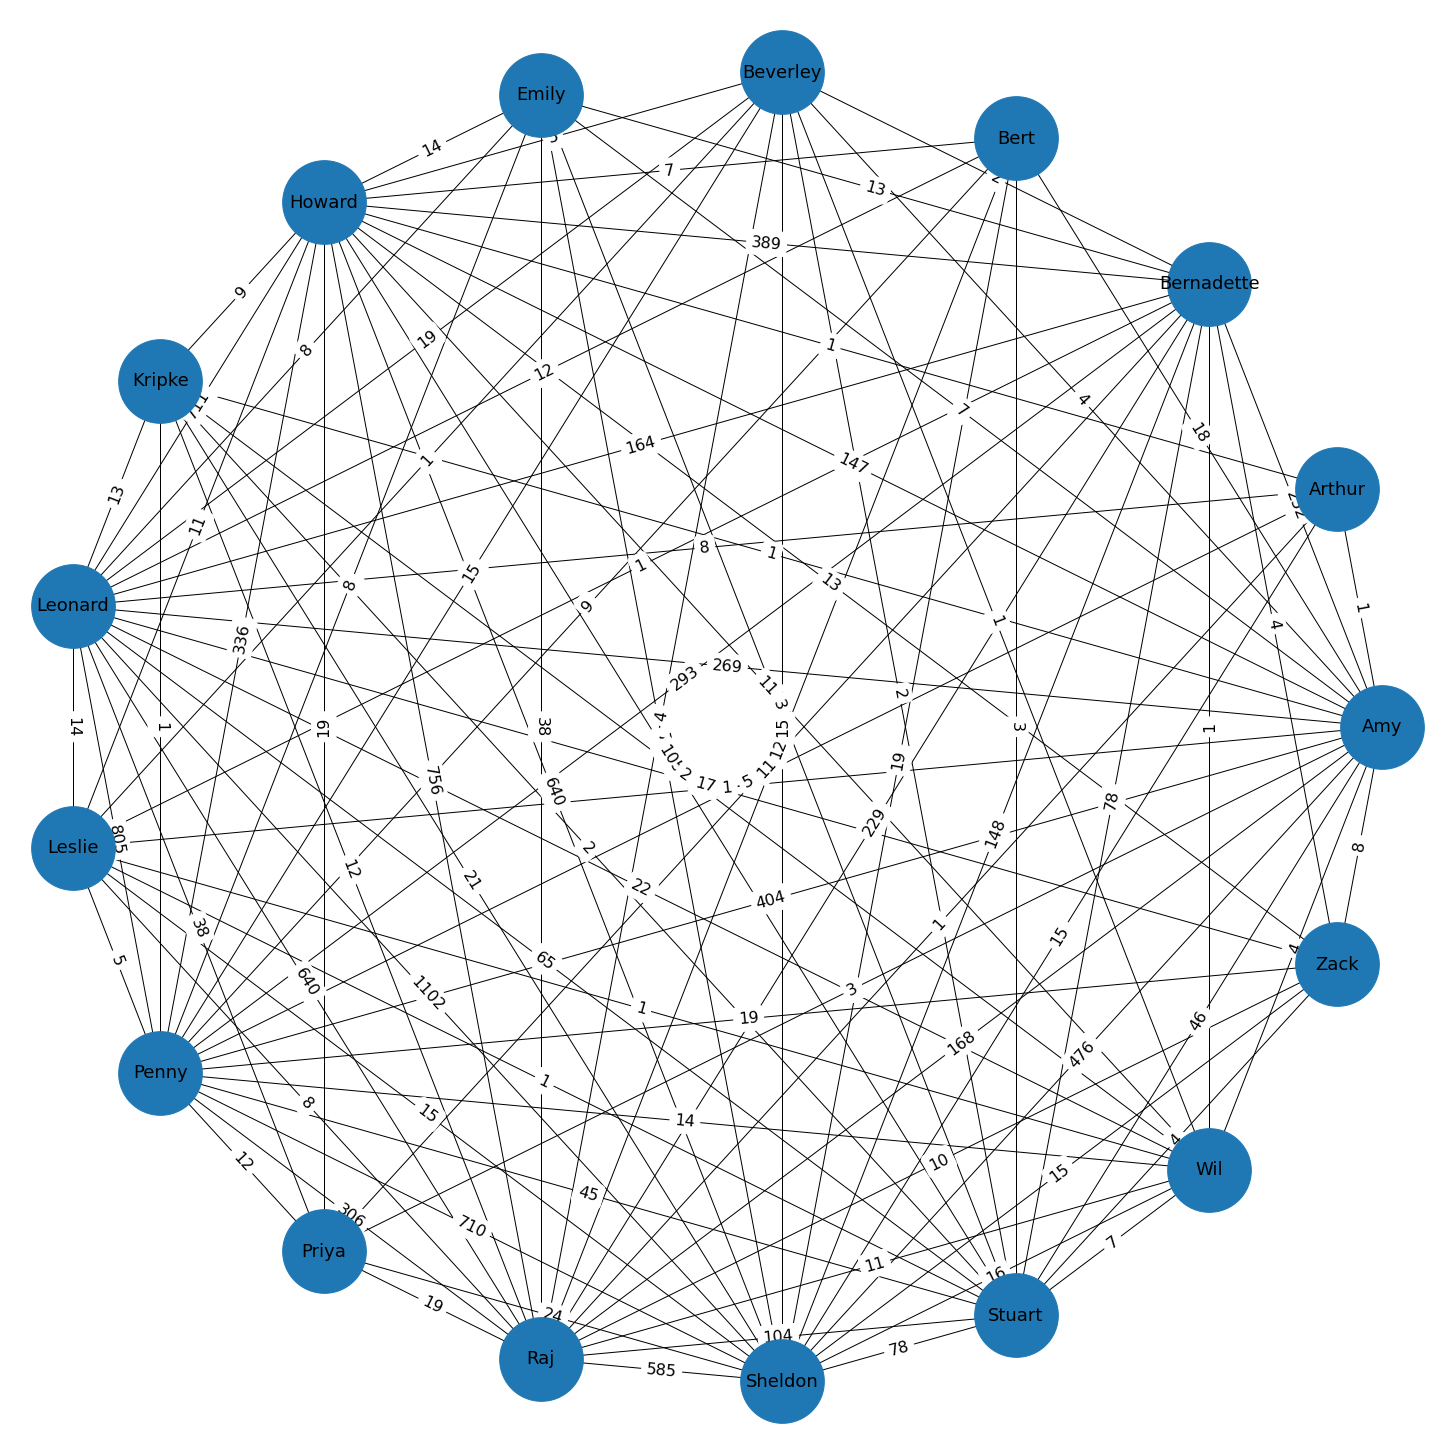

In [ ]:
import networkx as nx
plt.figure(figsize=(20,20)) 
FG = nx.from_numpy_matrix(np.matrix(fam_mat), create_using=nx.Graph)
layout = nx.circular_layout(FG)
fg_ed_weights = nx.get_edge_attributes(FG,'weight')
nx.draw_circular(FG,node_size=7000)
nx.draw_networkx_labels(FG, pos=layout,labels = labels, font_size=18)
nx.draw_networkx_edge_labels(FG,pos=layout, edge_labels=fg_ed_weights,font_size=16)
plt.show()

**GOSSIP GRAPH**

In [ ]:
# Gossip Graph


# Creating a Dataframe - scene_presence that matches scenes and characters in the corresponding scenes
sc_i = pd.DataFrame(dfc.groupby(['EpisodeScenes','Character'])['wordcount'].sum())
sc_i.reset_index(inplace=True)
sc_i = sc_i.drop(columns = "wordcount")
sc_i["link"] = 1
scene_presence  = pd.DataFrame(sc_i.groupby('EpisodeScenes')['Character'].agg(list).reset_index())
scene_presence  = scene_presence.rename(columns = {"Character" : "presentCharacters"})

In [ ]:

dc_i = dfc.copy()
dc_i = dc_i.drop(columns = ["Season","wordcount","Episode","Scene"])
dc_i.reset_index(inplace=True)
dc_i = dc_i.drop(columns = "index")
# dc_i.head()

# creating a list of characters in lowercase & adding whitespace after names to avoid inclusion of wil in Wil
chars = list(values)
chars = [x.lower() for x in chars]
chars = ['{0} '.format(k) for k in chars]

# Gathering all character names spoken in lines in stack of lists
a = []
b = []
for i in range(0,dc_i.shape[0]):
  a.append([k for k in chars if k in dc_i.Lines[i]])
  b.append(len([k for k in chars if k in dc_i.Lines[i]]))

# Removing padded whitespace earlier added
ar = []
for i in range(0,len(a)):
  ar.append([x.strip(' ') for x in a[i]])


# Collecting all gossipwords 
dc_i["gossipwords"] = ar
dc_i["gossipcount"] = b

dc_i

,Character,Lines,EpisodeScenes,gossipwords,gossipcount
0,Sheldon,so if a photon is directed through a plane wi...,Series 01 Episode 01 -0 - A corridor at a spe...,[],0
1,Leonard,agreed what s your point,Series 01 Episode 01 -0 - A corridor at a spe...,[],0
2,Sheldon,there s no point i just think it s a good id...,Series 01 Episode 01 -0 - A corridor at a spe...,[],0
3,Leonard,excuse me,Series 01 Episode 01 -0 - A corridor at a spe...,[],0
4,Leonard,one across is aegean eight down is nabakov ...,Series 01 Episode 01 -0 - A corridor at a spe...,[],0
...,...,...,...,...,...
47992,Sheldon,uh breakfast yes lunch no i did have a cou...,Series 10 Episode 24 -2804 - Sheldon’s office.,[],0
47993,Sheldon,how thoughtful thank you,Series 10 Episode 24 -2804 - Sheldon’s office.,[],0
47994,Sheldon,and i with you question are you seeking a r...,Series 10 Episode 24 -2804 - Sheldon’s office.,[],0
47995,Sheldon,well that would raise a number of problems ...,Series 10 Episode 24 -2804 - Sheldon’s office.,[],0


In [ ]:
# Gossip Dialogies of the Data 
gossip = dc_i.copy() #[dc_i['gossipcount'] != 0]   # Optionally dropping all dialogues without gossip
gossip.reset_index(inplace=True)
gossip = gossip.drop(columns = "index")


# Assigning Present Characters from scene_presence : list of Scenes and Corresponding Characters 
gossip["presentChars"] = np.nan
for i in range(0,scene_presence.shape[0]):
  go_ind = gossip.index[gossip['EpisodeScenes'] == scene_presence['EpisodeScenes'][i]].tolist()
  for j in go_ind:
    sp = [x.lower() for x in scene_presence['presentCharacters'][i]]
    gossip["presentChars"][j] = list(sp)


# # Cleaning gossip DataFrame to keep only graph essential data
# # 1.  Lines data is removed since we collected relevant info in gossipwords
# # 2.  gossipcount is removed due to irrelevance
gcount = gossip["gossipcount"]
gossip = gossip.drop(columns = ["Lines","gossipcount"])

# Finding the exact dialogues of gossip by definition of absence in scene

gp = []
for i in range(0,gossip.shape[0]):
  gp.append([x for x in gossip["gossipwords"][i] if x not in  gossip["presentChars"][i] ])

gossip["gossipInabsence"] = gp 

gossip

,Character,EpisodeScenes,gossipwords,presentChars,gossipInabsence
0,Sheldon,Series 01 Episode 01 -0 - A corridor at a spe...,[],"[leonard, sheldon]",[]
1,Leonard,Series 01 Episode 01 -0 - A corridor at a spe...,[],"[leonard, sheldon]",[]
2,Sheldon,Series 01 Episode 01 -0 - A corridor at a spe...,[],"[leonard, sheldon]",[]
3,Leonard,Series 01 Episode 01 -0 - A corridor at a spe...,[],"[leonard, sheldon]",[]
4,Leonard,Series 01 Episode 01 -0 - A corridor at a spe...,[],"[leonard, sheldon]",[]
...,...,...,...,...,...
47992,Sheldon,Series 10 Episode 24 -2804 - Sheldon’s office.,[],[sheldon],[]
47993,Sheldon,Series 10 Episode 24 -2804 - Sheldon’s office.,[],[sheldon],[]
47994,Sheldon,Series 10 Episode 24 -2804 - Sheldon’s office.,[],[sheldon],[]
47995,Sheldon,Series 10 Episode 24 -2804 - Sheldon’s office.,[],[sheldon],[]


In [ ]:
# Removing dialogues without actual gossip
gossip_diag = gossip[gossip.astype(str)['gossipInabsence'] != '[]']
gossip_diag.reset_index(inplace=True)
gossip_diag = gossip_diag.drop(columns="index")
gossip_diag

,Character,EpisodeScenes,gossipwords,presentChars,gossipInabsence
0,Leonard,Series 01 Episode 01 -2 - Sheldon and Leonard...,[bert],"[howard, leonard, penny, raj, sheldon]",[bert]
1,Leonard,Series 01 Episode 01 -3 - In the bathroom.,[sheldon],"[leonard, penny]",[sheldon]
2,Sheldon,Series 01 Episode 01 -4 - Leonard and Sheldon...,[penny],"[leonard, sheldon]",[penny]
3,Leonard,Series 01 Episode 01 -4 - Leonard and Sheldon...,[penny],"[leonard, sheldon]",[penny]
4,Penny,Series 01 Episode 01 -5 - Back at the apartment.,"[leonard, sheldon]","[howard, penny]","[leonard, sheldon]"
...,...,...,...,...,...
1958,Sheldon,Series 10 Episode 24 -2801 - The apartment.,[amy],"[bernadette, howard, leonard, penny, raj, shel...",[amy]
1959,Sheldon,Series 10 Episode 24 -2802 - The street.,"[amy, leonard]","[penny, sheldon]","[amy, leonard]"
1960,Sheldon,Series 10 Episode 24 -2803 - Sheldon and Amy’...,[amy],"[penny, sheldon]",[amy]
1961,Sheldon,Series 10 Episode 24 -2803 - Sheldon and Amy’...,[leonard],"[penny, sheldon]",[leonard]


In [ ]:
#Exploding gossipInabsence to get rows of individual gossip instances in scene by same character about different person
gossip_diag_complete = gossip_diag.explode('gossipInabsence')
gossip_diag_complete

,Character,EpisodeScenes,gossipwords,presentChars,gossipInabsence
0,Leonard,Series 01 Episode 01 -2 - Sheldon and Leonard...,[bert],"[howard, leonard, penny, raj, sheldon]",bert
1,Leonard,Series 01 Episode 01 -3 - In the bathroom.,[sheldon],"[leonard, penny]",sheldon
2,Sheldon,Series 01 Episode 01 -4 - Leonard and Sheldon...,[penny],"[leonard, sheldon]",penny
3,Leonard,Series 01 Episode 01 -4 - Leonard and Sheldon...,[penny],"[leonard, sheldon]",penny
4,Penny,Series 01 Episode 01 -5 - Back at the apartment.,"[leonard, sheldon]","[howard, penny]",leonard
...,...,...,...,...,...
1959,Sheldon,Series 10 Episode 24 -2802 - The street.,"[amy, leonard]","[penny, sheldon]",amy
1959,Sheldon,Series 10 Episode 24 -2802 - The street.,"[amy, leonard]","[penny, sheldon]",leonard
1960,Sheldon,Series 10 Episode 24 -2803 - Sheldon and Amy’...,[amy],"[penny, sheldon]",amy
1961,Sheldon,Series 10 Episode 24 -2803 - Sheldon and Amy’...,[leonard],"[penny, sheldon]",leonard


In [ ]:
# From the created new vector of gossip_diag_complete - the columns 
# Character and gossipInabsence represent the start node and end nodes respectively 
# for a directed gossip graph.
# Next we remove the unnecessary columns and Match the case settings for comparision.

gossip_diag_complete.reset_index(inplace=True)
gossip_diag_complete = gossip_diag_complete.drop(columns = ["index","EpisodeScenes","gossipwords","presentChars"])
gossip_diag_complete["gossipInabsence"] = gossip_diag_complete["gossipInabsence"].str.title()
gossip_diag_complete

,Character,gossipInabsence
0,Leonard,Bert
1,Leonard,Sheldon
2,Sheldon,Penny
3,Leonard,Penny
4,Penny,Leonard
...,...,...
2163,Sheldon,Amy
2164,Sheldon,Leonard
2165,Sheldon,Amy
2166,Sheldon,Leonard


In [ ]:
gossip_diag_complete = gossip_diag_complete.groupby(["Character","gossipInabsence"]).size().reset_index().rename(columns={0:'weight'})
gossip_diag_complete

,Character,gossipInabsence,weight
0,Amy,Arthur,2
1,Amy,Bernadette,15
2,Amy,Bert,4
3,Amy,Howard,14
4,Amy,Kripke,5
...,...,...,...
118,Stuart,Raj,1
119,Stuart,Sheldon,4
120,Stuart,Wil,1
121,Zack,Leonard,1


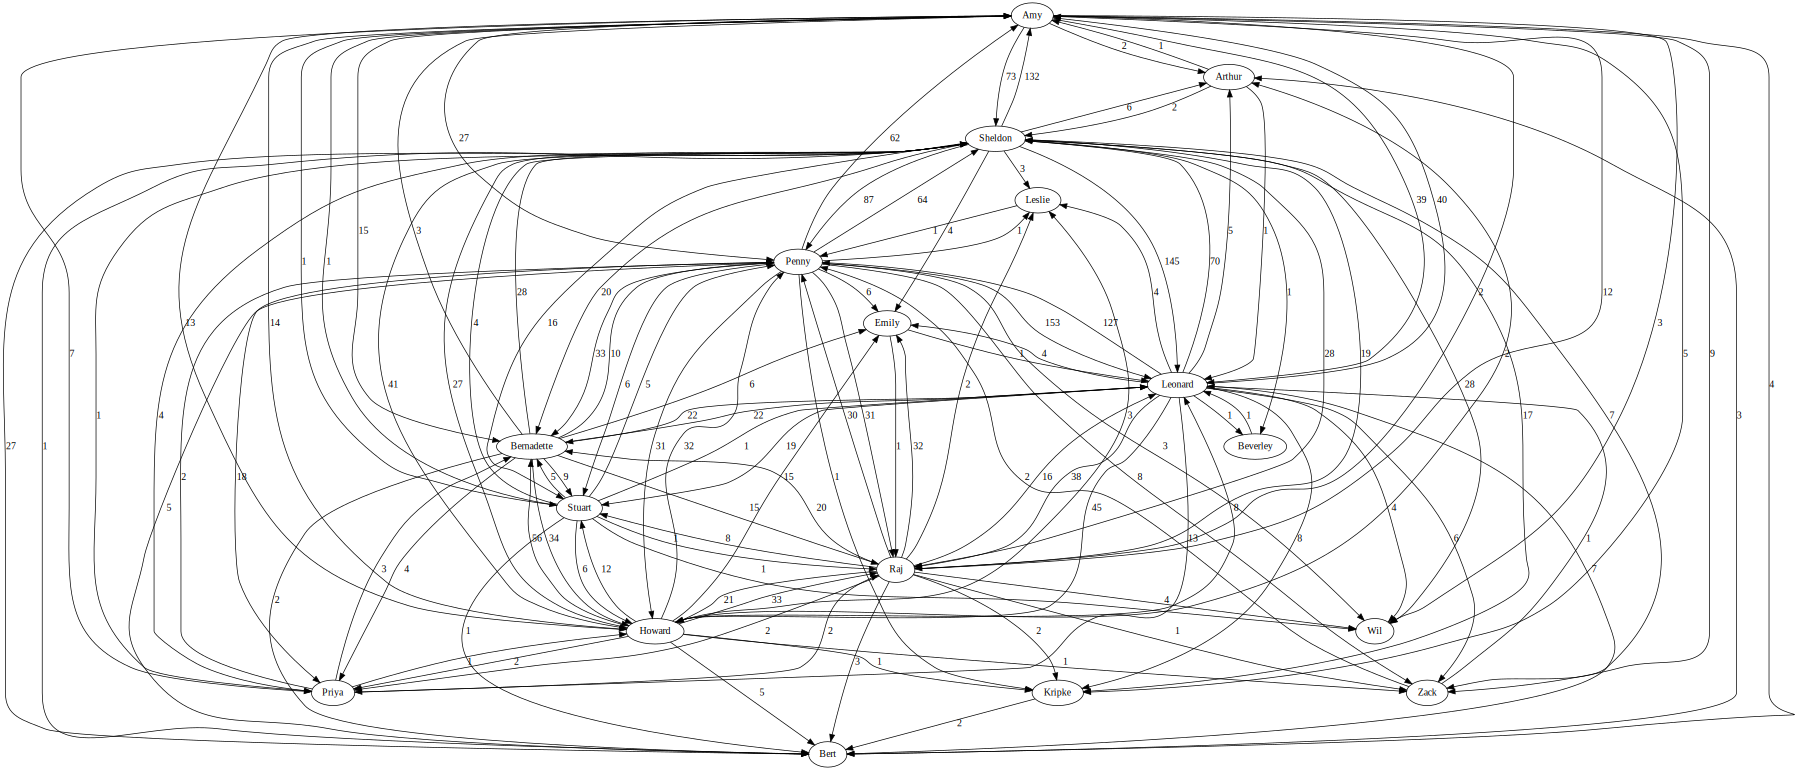

In [ ]:
# Drawing a Directed Weighted Graph showing Gossip

from graphviz import Digraph

r = list(gossip_diag_complete.to_records(index=False))

GG = Digraph()
GG.attr(size='25', layout = 'dot', rankdir = 'TB')
GG.attr('node', shape='ellipse')

nodelist = []

for row in r:
    node1, node2, weight = [str(i) for i in row ]

    if node1 not in nodelist:
        GG.node(node1)
        nodelist.append(node2)
    if node2 not in nodelist:
        GG.node(node2)
        nodelist.append(node2)

    GG.edge(node1,node2, label = weight)

GG

Now, answer the following questions:

**Q9**. (5 points) Sheldon claims that every character in the show is familiar with everyone else through at most one intermediary. Based on the familiarity graph, is this true? If not, at most how many intermediaries are needed?

In [ ]:
# Node correspondance by key values
labels

{0: 'Amy',
 1: 'Arthur',
 2: 'Bernadette',
 3: 'Bert',
 4: 'Beverley',
 5: 'Emily',
 6: 'Howard',
 7: 'Kripke',
 8: 'Leonard',
 9: 'Leslie',
 10: 'Penny',
 11: 'Priya',
 12: 'Raj',
 13: 'Sheldon',
 14: 'Stuart',
 15: 'Wil',
 16: 'Zack'}

In [ ]:
# Computing Shortest Paths between any 2 given nodes(Characters) in the graph

# The code below gives a 2 dataframe columns
# 1. index : 0 corresponding to character indexes to be understood as source nodes
# 2. index : 1 is a dictionary of distances with key as the target node and value as distance.
short_paths_lengths = pd.DataFrame(nx.all_pairs_shortest_path_length(FG))
short_paths_lengths.head()

,0,1
0,0,"{0: 0, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: ..."
1,1,"{1: 0, 0: 1, 6: 1, 8: 1, 10: 1, 12: 1, 13: 1, ..."
2,2,"{2: 0, 0: 1, 4: 1, 5: 1, 6: 1, 8: 1, 9: 1, 10:..."
3,3,"{3: 0, 0: 1, 6: 1, 8: 1, 10: 1, 12: 1, 13: 1, ..."
4,4,"{4: 0, 0: 1, 2: 1, 6: 1, 8: 1, 9: 1, 10: 1, 12..."


In [ ]:
# The adjacency matrix of "simultaneous presence" is extarcted using column 1
# corresponding to the dictionary of node:distance pairs. 
# The entries x indicates measure of familiarity
#  -> 1 : Direct link connection - direct familiarity
#  -> x : X links required for familiarity 
shortest_path_familiarity = pd.DataFrame(short_paths_lengths[1].tolist())
shortest_path_familiarity

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,0,2,2,2,2,1,2,1,2,1,2,1,1,2,2,2
2,1,2,0,2,1,1,1,2,1,1,1,1,1,1,1,1,1
3,1,2,2,0,2,2,1,2,1,2,1,2,1,1,1,2,2
4,1,2,1,2,0,2,1,2,1,1,1,2,1,1,1,1,2
5,1,2,1,2,2,0,1,2,1,2,1,2,1,1,1,2,2
6,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1
7,1,2,2,2,2,2,1,0,1,2,1,2,1,1,1,1,2
8,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
9,1,2,1,2,1,2,1,2,1,0,1,2,1,1,1,1,2


<font color='red'> **Answer 9** </font> 


As seen from the adjacency matrix of familiarity, there are atmost 2 links required for any person to know any other person from a list of recurrent characters.

**Q10**. (5 points) Who is the character through whom the largest number of these indirect familiarities happen? Calculate an appropriate centrality metric on the familiarity graph to answer this question. You can use the package networkx for this section.

<font color='red'> **Answer 10** </font>

Centrality measures suitable for this is the Betweenness Centrality measure which considers the number of shortest paths traversing a particular node.
The higher the betweenness, the most common is the person to act as indirect familiarity. 

In [ ]:
indirect_familiarity_betweenness = nx.betweenness_centrality(FG)

# # Additionally Load and Degree Centrality for comparison
# indirect_familiarity_load        = nx.load_centrality(FG)
# indirect_familiarity_degree      = nx.degree_centrality(FG)

bet_value = max(indirect_familiarity_betweenness.values()) 
bet_keys = [k for k, v in indirect_familiarity_betweenness.items() if v == bet_value]

# Central Characters 
print("Central Characters which connect most characters with equal centrality are : ")
print([labels[x] for x in bet_keys])

Central Characters which connect most characters with equal centrality are : 
['Amy', 'Howard', 'Leonard', 'Penny', 'Raj', 'Sheldon']


**Q11**. (2.5 points) Another claim of Sheldon's is that every recurrent character in the show gossips about all the other recurrent characters. What property of the gossip graph would correspond to this? Does the gossip graph possess that property? If not, then is it the case that for every pair of recurrent characters, at least one gossips about the other? What property would this correspond to?

<font color='red'> **Answer 11** </font>

**Claim** - Every character gossips about all other characters.


This corresponds to ***bidirectional completeness***.
The claim is the Gossip Graph is a Directed Complete Graph *bidirectionally for any node*.

Nodes = n

Edges = n×(n-1) 

As visible from the Gossip Graph, this is not the case. There are several character nodes, which do not possess many out degrees - do not gossip about everyone.  

**Claim** - For every pair of characters, atleast one gossips about the other.

This corresponds to ***completeness***.
The claim is the Gossip Graph is atleast a Complete Graph *with one of the either direction edges between any node pair*.

As visible from the Gossip Graph again, this is not the case.

**Q12**. (5 points) Use the gossip graph and the familiarity graph to figure out if for every pair of recurrent characters, one of them has gossiped about the other if and only if they know each other. Explain your method - the simpler, the better.

**Answer 12**

In the code below, we use familiarity matrix and gossip matrix as our inputs.

In the familiarity matrix - if an entry is 0, it represents that *(row,column)* character pair do not know each other.

In the gossip matrix  - if an entry is 0, it represents that *(row)* character has not gossiped about the *(column)* character.


In order to find out character pairs, either of whom have gossiped about the other, we perform an element-wise multiplication on the two. This eliminates all pairs who do not know each other, since that entry is multiplied by 0 from the familiarity matrix.

In [ ]:
familiarity_matrix = pd.DataFrame(fam_mat,columns = labels.values() , index = labels.values())
familiarity_matrix

,Amy,Arthur,Bernadette,Bert,Beverley,Emily,Howard,Kripke,Leonard,Leslie,Penny,Priya,Raj,Sheldon,Stuart,Wil,Zack
Amy,701,1,252,18,4,7,147,1,269,1,404,3,168,476,46,4,8
Arthur,1,16,0,0,0,0,1,0,8,0,5,0,1,15,0,0,0
Bernadette,252,0,593,0,2,13,389,0,164,1,293,11,229,148,78,1,4
Bert,18,0,0,25,0,0,7,0,12,0,9,0,12,19,3,0,0
Beverley,4,0,2,0,23,0,5,0,19,1,15,0,4,15,2,1,0
Emily,7,0,13,0,0,40,14,0,8,0,8,0,38,7,3,0,0
Howard,147,1,389,7,5,14,1148,9,711,11,336,19,756,640,105,11,13
Kripke,1,0,0,0,0,0,9,21,13,0,1,0,12,21,2,2,0
Leonard,269,8,164,12,19,8,711,13,1534,14,805,38,640,1102,65,22,17
Leslie,1,0,1,0,1,0,11,0,14,18,5,0,8,15,1,1,0


In [ ]:
"Wil" in gossip_diag_complete['Character']

False

This implies Wil has never gossiped about anyone on the show.
A row of zeros describing this fact is added.

In [ ]:
gossip_matrix = gossip_diag_complete.pivot_table(index='Character',columns='gossipInabsence',aggfunc=sum).fillna(0)
gossip_matrix.loc['Wil'] = [0] * gossip_matrix.shape[1]
gossip_matrix = gossip_matrix.sort_index()

In [ ]:
f_m = familiarity_matrix.to_numpy()
g_m = gossip_matrix.to_numpy()

# Elementwise multiplication
c_g = np.multiply(f_m,g_m)

# Creating a DataFrame showing characters, who know each other and have gossiped about the other.
characters_who_gossip = pd.DataFrame(c_g,columns=labels.values(),index = labels.values())

characters_who_gossip[characters_who_gossip != 0] = 1

characters_who_gossip

,Amy,Arthur,Bernadette,Bert,Beverley,Emily,Howard,Kripke,Leonard,Leslie,Penny,Priya,Raj,Sheldon,Stuart,Wil,Zack
Amy,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Arthur,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Bernadette,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
Bert,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Beverley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Emily,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Howard,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
Kripke,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Leonard,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Leslie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## Task D: The Detective's Hat (30 points)

Sheldon claims that given a dialogue line, he can, with an accuracy of above 70%, say whether it's by himself or by someone else. Leonard contests this claim, since he believes that this claimed accuracy is too high. Leonard also suspects that it's easier for Sheldon to distinguish the lines that _aren't_ his, rather than those that _are_. We want you to put on the (proverbial) detective's hat and to investigate this claim.

**Q13**. (7.5 points) Divide the set of all dialogue lines into two subsets: the training set, consisting of all the seasons except the last two, and the test set, consisting of the last two seasons. Each of your data points (which is one row of your matrix) is one **dialogue line**. Now, use the scikit-learn class **TfIdfVectorizer** to create TF-IDF representations for the data points in your training and test sets. Note that since you're going to train a machine learning model, everything used in the training needs to be independent of the test set. As a preprocessing step, remove stopwords and words that appear only once from your vocabulary. Use the simple tokenizer provided in `helpers/helper_functions.py` as an input to the TfidfVectorizer class, and use the words provided in `helpers/stopwords.txt` as your stopwords.

In [ ]:
# Creating DataFrame from existing data
df_m = dfc.copy()
df_m['Lines'] = df_m['Lines'].apply(mod_text)
df_m = df_m.drop(columns=['Episode','Scene','wordcount','EpisodeScenes'])

# Mapping Character to numeric labels : 0 - not, Sheldon 1 - Sheldon
df_m['label'] = 0
df_m['label'][df_m.loc[df_m['Character'] == "Sheldon"].index] = 1

# df_m['label'][df_m.loc[df_m['Character'] != "Sheldon"].index] = 0
df_m.reset_index(inplace=True)

df_m.head()

,index,Season,Character,Lines,label
0,0,01,Sheldon,so if a photon is directed through a plane wi...,1
1,1,01,Leonard,agreed what s your point,0
2,2,01,Sheldon,there s no point i just think it s a good id...,1
3,3,01,Leonard,excuse me,0
4,4,01,Leonard,one across is aegean eight down is nabakov ...,0


In [ ]:
# Importing List of stop words
sw = pd.read_csv('stopwords.txt',header=None)

# Tokenizer
def simple_tokeniser(text):
    return text.split()

In [ ]:
# Tokeninzing and Finding common words
from sklearn.feature_extraction.text import TfidfVectorizer

dialogues = df_m.Lines
# Creaing and Setting Vectorizer parameters 
word_vectorizer = TfidfVectorizer(tokenizer = simple_tokeniser, stop_words= set(sw), analyzer = "word")

# Transforming Entire Dialogue Data in set of words
word_vectorizer.fit(dialogues)
show_word_features = word_vectorizer.transform(dialogues)

vectorizer_features = word_vectorizer.get_feature_names() 
show_vocab = word_vectorizer.vocabulary_
show_idf   = word_vectorizer.idf_
idf_values = dict(zip(vectorizer_features, show_idf))

In [ ]:
print("Show Vocabulary length is: {}".format(len(show_vocab)))

Show Vocabulary length is: 20962


In [ ]:
# Spllitting Corpus into Training and Test Data sets

# Extracting Training Dialogue Data
train = df_m.loc[~df_m["Season"].isin(['09','10']) ]
X_train = train.Lines
y_train = train.label

# Extracting  Test Dialogue Data
test = df_m.loc[df_m["Season"].isin(['09','10']) ]
X_test  = test.Lines
y_test  = test.label

# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)


# TFIDF Vecotriser on Training & Test Data

word_vectorizer.fit(X_train)
X_train_word_features = word_vectorizer.transform(X_train)
X_test_word_features = word_vectorizer.transform(X_test)


vectorizer_features = word_vectorizer.get_feature_names() 
show_vocab = word_vectorizer.vocabulary_
show_idf   = word_vectorizer.idf_
idf_values = dict(zip(vectorizer_features, show_idf))

print(X_train_word_features.shape,X_test_word_features.shape)

(37836, 19367) (10161, 19367)


**Q14**. (5 points) Find the set of all words in the training set that are only uttered by Sheldon. Is it possible for Sheldon to identify himself only based on these? Use the test set to assess this possibility, and explain your method.

In [ ]:
# Check Using training data

dialogues_sheldon = X_train.loc[y_train == 1]
dialogues_others  = X_train.loc[y_train == 0]

# TFIDF Vecotriser on Sheldon's Dialogues
word_vectorizer.fit(dialogues_sheldon)
sheldon_vocab = word_vectorizer.vocabulary_

# TFIDF Vecotriser on Other's Dialogues
word_vectorizer.fit(dialogues_others)
others_vocab = word_vectorizer.vocabulary_

# Comparing Sheldon's Vocabulary with Show's Training Set Vocabulary 
sheldon_words = list(sheldon_vocab.keys())
others_words  = list(others_vocab.keys())

# Check if Sheldon's words are a subset of All others entire exclusively
print("Is Sheldon's vocabulary a subset of others's vocabulary for training data?: {}".format(set(sheldon_words) <= set(others_words)))

# Check on Test Set data

dialogues_sheldon_test = X_test.loc[y_test == 1]
dialogues_others_test  = X_test.loc[y_test == 0]

# TFIDF Vecotriser on Sheldon's Dialogues
word_vectorizer.fit(dialogues_sheldon_test)
sheldon_vocab_test = word_vectorizer.vocabulary_

# TFIDF Vecotriser on Other's Dialogues
word_vectorizer.fit(dialogues_others_test)
others_vocab_test = word_vectorizer.vocabulary_

# Comparing Sheldon's Vocabulary with Show's Training Set Vocabulary 
sheldon_words_test = list(sheldon_vocab_test.keys())
others_words_test  = list(others_vocab_test.keys())

# Check if Sheldon's words are a subset of All others entire exclusively
print("Is Sheldon's vocabulary a subset of others's vocabulary for test data?: {}".format(set(sheldon_words_test) <= set(others_words_test)))


Is Sheldon's vocabulary a subset of others's vocabulary for training data?: False
Is Sheldon's vocabulary a subset of others's vocabulary for test data?: False


**Q15**. (17.5 points) Now, perform singular value decomposition (SVD) on the training TF-IDF matrix, and calculate a **25-dimensional approximation** for both the training and test TF-IDF matrices (you can do this using scikit-learn's **TruncatedSVD** class). Then, train a logistic regression classifier with 10-fold cross-validation (using the scikit-learn **LogisticRegressionCV** class) on the output of the SVD that given a dialogue line, tells you whether it's by Sheldon or by someone else.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**i)** (7.5 points) Report precision, recall and F1-score for both classes (Sheldon and not-Sheldon), as well as accuracy, of your classifier on the training set and the test set. You need to implement the calculation of the evaluation measures (precision, etc.) yourself -- using the scikit-learn functions for them is not allowed.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ii)** (5 points) What difference do you observe between the model's scores on the training and test sets? What could you infer from the amount of difference you see? What about the difference between scores on the two classes? Given the performance of your classifier, is Leonard right that the accuracy Sheldon claims is unattainable? What about his suspicions about the lines that Sheldon can and cannot distinguish?
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**iii)** (2.5 points) List 10 of the most extreme false positives and 10 of the most extreme false negatives, in terms of the probabilities predicted by the logistic regression model. What are common features of false positives? What about the false negatives?
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**iv)** (2.5 points) What is the most important feature in the model? What are the 5 most important words in this feature? _Hint: Think of the definition of an SVD, and that you did an SVD on the TF-IDF matrix with dialogue lines as rows and words as columns. You have projected the original data points onto a 25-dimensional subspace -- you need to look at the unit vectors you used for the projection._

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

# Applying TruncatedSVD to reduce dimensionality of dataset to 25 dimensions
svd = TruncatedSVD(n_components=25)
X_train_svd = svd.fit_transform(X_train_word_features)
X_test_svd  = svd.fit_transform(X_test_word_features)

In [ ]:
# Applying LogisticRegressionCV on Training dataset to fit model
LR_classifier = LogisticRegressionCV(cv=10,penalty='l2',solver='lbfgs',max_iter = 80,multi_class='ovr')

# Predictions on Train Data
LR_classifier.fit(X_train_svd,y_train)
y_pred_tr = LR_classifier.predict(X_train_svd)
y_pred_prob_tr = LR_classifier.predict_proba(X_train_svd)

model_coefficients = LR_classifier.coef_

# Predictions on Test Data
LR_classifier.fit(X_train_svd,y_train)
y_pred_ts = LR_classifier.predict(X_test_svd)
y_pred_prob_ts = LR_classifier.predict_proba(X_test_svd)

**Answer 15 (i)**

In [ ]:
# Function to Calculate Performance Metrics based on the given predicted and actual labels 
def performance_metrics(y_pred,y_test,cl):
  true_pos = 0
  true_neg = 0
  false_pos = 0
  false_neg = 0
  # Prediction on Class "Sheldon"
  if cl == 1:
    for p,t in zip(y_pred, y_test):
      if p==1 and t==1:
          true_pos+=1
      if p==0 and t==0:
          true_neg+=1
      if p==1 and t==0:
          false_pos+=1
      if p==0 and t==1:
          false_neg+=1
  # Prediction on Class "Not Sheldon"
  if cl == 0:
    for p,t in zip(y_pred, y_test):
      if p==0 and t==0:
          true_pos+=1
      if p==1 and t==1:
          true_neg+=1
      if p==0 and t==1:
          false_pos+=1
      if p==1 and t==0:
          false_neg+=1
  
  try : 
    precision = true_pos / float(true_pos + false_pos)
  except: 
    precision = 0
  try:
    recall = true_pos / float(true_pos + false_neg)
  except:
    recall = 0
  try:
    fscore = 2*precision*recall / (precision + recall)
  except:
    fscore = 0
  return precision, recall, fscore

In [ ]:
# Prediction Metrics on Class "Sheldon"

# Performace on Training Data Set
p_tr, r_tr, f_tr = performance_metrics(y_pred_tr,y_train,1) 
# Performace on Testing Data Set
p_ts, r_ts, f_ts = performance_metrics(y_pred_ts,y_test,1) 

print("Performance for Class : Sheldon\n")
print("For Training Data Set")
print("Precision  : {}".format(p_tr))
print("Recall  : {}".format(r_tr))
print("F1 score  : {}".format(f_tr))

print("For Test Data Set ")
print("Precision  : {} ".format(p_ts))
print("Recall  : {} ".format(r_ts))
print("F1 score  : {} \n ".format(f_ts))

# Prediction Metrics on Class "Not Sheldon"

# Performace on Training Data Set
p_trz, r_trz, f_trz = performance_metrics(y_pred_tr,y_train,0) 
# Performace on Testing Data Set
p_tsz, r_tsz, f_tsz = performance_metrics(y_pred_ts,y_test,0) 

print("Performance for Class : Not Sheldon \n")
print("For Training Data Set")
print("Precision  : {} ".format(p_trz))
print("Recall  : {} ".format(r_trz))
print("F1 score  : {} ".format(f_trz))

print("For Test Data Set ")
print("Precision  : {}".format(p_tsz))
print("Recall  : {} ".format(r_tsz))
print("F1 score  : {} ".format(f_tsz))


Performance for Class : Sheldon

For Training Data Set
Precision  : 0.5194805194805194
Recall  : 0.004231908590774439
F1 score  : 0.008395424493650959
For Test Data Set 
Precision  : 0.14358974358974358 
Recall  : 0.012516763522574878 
F1 score  : 0.023026315789473683 
 
Performance for Class : Not Sheldon 

For Training Data Set
Precision  : 0.7507349241240499 
Recall  : 0.9986964487034949 
F1 score  : 0.8571428571428571 
For Test Data Set 
Precision  : 0.7783463776841261
Recall  : 0.9789247854618879 
F1 score  : 0.867188373392957 


**Answer 15 (ii)**

According to the performance metrics, it can be seen that prediction of  dialogues' has a precision of around 50% but a very low recall - 0.7% on the training dataset. 
Thus, only half as many dialogues are relevant for the classification and the classifier fails at distinguishing Sheldon's dialogues.
For the test set, the values deteriorate to precision of around 14% and a recall of 4%. 

For both the training and test datasets, the classifier fails at predicting the class of "Sheldon".

Prediction of class "Not Sheldon" is observed to be very good. With precison of 75% and a recall of almost 1.0 on the training data, this model clearly distinguishes clearly  on all the available datapoints, that a given dialogue is not Sheldon. 

For the test dataset, the classifier has fairly high on predicting "not Sheldon".

Leonard's doubt is valid on predicting Sheldon's dialogue.



**Answer 15 (iii)**

The prediction probabilities are shown the variable below.

In [ ]:
# Most Extreme False Positives and Negatives for Class Sheldon = 1
from heapq import nlargest
# Collecting prediction probabilities of  all false positives and False negatives in separate arrays
fp = []
fn = []
for p,t in zip(y_pred_ts, y_test):
      if p==0 and t==1:
          fp.append(y_pred_prob_ts[t][1])
      if p==1 and t==0:
          fn.append(y_pred_prob_ts[t][1])

# Printing Lowest 10 False Positive and False Negative Probabilities
print("Most Extreme 10 False Positives :")
print(nlargest(10, fp))
print("Most Extreme 10 False Negatives :")
print(nlargest(10, fn))

Most Extreme 10 False Positives :
[0.2250925182839603, 0.2250925182839603, 0.2250925182839603, 0.2250925182839603, 0.2250925182839603, 0.2250925182839603, 0.2250925182839603, 0.2250925182839603, 0.2250925182839603, 0.2250925182839603]
Most Extreme 10 False Negatives :
[0.12396618982394718, 0.12396618982394718, 0.12396618982394718, 0.12396618982394718, 0.12396618982394718, 0.12396618982394718, 0.12396618982394718, 0.12396618982394718, 0.12396618982394718, 0.12396618982394718]


**Answer 15 (iv)**

In [ ]:
model_coefficients = abs(LR_classifier.coef_[0])
most_important_feature = max(model_coefficients)
most_important_feature_index = model_coefficients.argmax()

In [ ]:
component_vectors = svd.components_
most_important_component = component_vectors[most_important_feature_index]
describing_feature = dict(zip(vectorizer_features,most_important_component))
top_5_words = nlargest(5, describing_feature, key=describing_feature.get)
print("Top 5 words of the describing feature:")
print(top_5_words)

Top 5 words of the describing feature:
['it', 'oh', 'okay', 'thank', 'we']
